In [64]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np



from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso, Ridge, RidgeClassifier
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, BaggingRegressor, StackingRegressor, StackingClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.svm import SVR, SVC
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedKFold, KFold,cross_val_score
from sklearn.metrics import make_scorer
from sklearn.base import RegressorMixin, ClassifierMixin, BaseEstimator
from sklearn.ensemble import VotingClassifier

from xgboost import XGBClassifier, XGBRegressor
from lightgbm import LGBMClassifier, LGBMRegressor

from skopt.callbacks import DeltaYStopper
from skopt.space import Real, Integer,Categorical
from skopt import BayesSearchCV




### Data Collection

In [65]:
# import requests

# # URLs of the files
# train_data_url = 'https://www.raphaelcousin.com/modules/module6/exercise/module6_exercise_train.csv'
# test_data_url = 'https://www.raphaelcousin.com/modules/module6/exercise/module6_exercise_test.csv'

# # Function to download a file
# def download_file(url, file_name):
#     response = requests.get(url)
#     response.raise_for_status()  # Ensure we notice bad responses
#     with open(file_name, 'wb') as file:
#         file.write(response.content)
#     print(f'Downloaded {file_name} from {url}')

# # Downloading the files
# download_file(train_data_url, 'module6_exercise_train.csv')
# download_file(test_data_url, 'module6_exercise_test.csv')

In [66]:
data_train = pd.read_csv('module6_exercise_train.csv', index_col='index')
data_test = pd.read_csv('module6_exercise_test.csv', index_col='index')

### Data Analysis

In [67]:
data_train

,09_30_00,09_50_00,10_10_00,10_30_00,10_50_00,11_10_00,11_30_00,11_50_00,12_10_00,12_30_00,12_50_00,13_10_00,13_30_00,13_50_00,14_10_00,14_30_00,14_50_00,15_10_00,end_of_day_return
index,,,,,,,,,,,,,,,,,,,
0,-3.345378,0.471913,0.111795,0.897695,-1.836632,0.853765,-1.169854,-0.515758,-0.672838,0.737822,-0.110476,0.120739,0.658008,-0.033507,-0.809134,-0.286582,-0.431717,-0.094759,-0.741115
1,0.325809,0.367349,-0.048372,-1.513650,0.355659,-3.117421,-0.881352,-0.007122,0.243771,0.016151,0.114610,-0.604529,0.148780,-0.229934,-0.506916,-0.604501,-0.348392,0.318222,1.174188
2,1.105315,1.767107,0.053923,0.001599,1.120131,-0.358522,-1.279510,-0.229908,0.918732,0.486627,0.143440,0.201272,-0.166683,-0.701750,-0.431819,-0.418378,0.645661,0.389446,-1.583453
3,-0.139515,0.400993,1.376735,0.248226,0.896831,-0.064874,-0.546736,-0.596431,-0.261391,0.233740,-0.242694,-0.713535,-0.331204,0.165809,-0.330894,0.883535,0.907813,-0.191447,1.614671
4,6.826520,2.643832,-0.686910,-0.175818,0.418767,-0.550301,-0.002805,-0.272078,0.798230,-0.481628,0.281879,0.762998,2.641929,-2.324375,-0.402507,0.155151,-0.467507,-0.596658,1.183321
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,-0.883029,0.062304,-0.297792,-0.512609,0.147675,0.128645,-0.722808,-0.112308,0.086121,-0.313414,0.407098,0.335073,0.681523,-0.380009,0.926100,-0.608350,0.619678,-0.334050,0.649858
3996,0.688887,-0.667074,0.346701,1.195935,-0.084245,0.007249,0.603659,-0.457421,0.383087,-0.004021,0.564976,0.397662,0.127530,0.412853,-0.078965,-0.017075,-0.219030,0.010699,0.487709
3997,0.246288,0.175187,0.463585,0.134366,-0.500703,1.491530,0.637691,0.048974,-0.218061,0.322912,-0.215735,-1.183474,-0.444753,0.468896,0.337624,0.367041,-0.318075,0.696240,0.111035


In [68]:
data_test

,09_30_00,09_50_00,10_10_00,10_30_00,10_50_00,11_10_00,11_30_00,11_50_00,12_10_00,12_30_00,12_50_00,13_10_00,13_30_00,13_50_00,14_10_00,14_30_00,14_50_00,15_10_00
index,,,,,,,,,,,,,,,,,,
9000,-0.090754,-1.786981,-0.470490,0.545190,1.048661,2.133359,0.769342,0.829361,0.329543,-0.260203,0.557235,0.052095,-0.083066,-0.910045,-0.956864,0.058267,-0.406571,-0.647216
9001,7.611001,0.247861,-2.001656,-0.804107,-0.473829,1.259438,0.195555,0.101885,-1.077060,0.573665,-0.434945,-0.183208,0.463489,-0.559725,0.091081,-0.084349,0.096026,0.091618
9002,1.150194,0.091151,2.545506,0.775302,-1.025222,-0.894295,-0.440365,0.671856,0.428863,0.485069,-0.782287,-0.352444,0.257920,0.526284,-0.029759,-0.797493,0.743176,-0.220204
9003,-0.884874,-1.103034,0.755916,-0.412053,0.178287,-0.104350,-0.212248,0.081726,0.380151,0.005660,-0.501693,0.817424,-0.470671,0.140688,1.406956,1.754916,0.261623,-0.495981
9004,-0.589833,0.379596,-0.545424,-0.217812,-0.730794,-0.480085,0.470663,1.298896,-0.710654,0.867138,1.515816,0.197528,0.756792,0.090558,-0.819575,0.136961,0.023876,-0.451478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.170209,-0.057276,-0.822165,-1.232996,-1.187110,0.179970,0.212011,-0.802815,-1.420647,1.098860,0.010170,-0.776480,-0.428853,-1.547797,-0.111830,0.130183,-1.493579,-0.862974
9996,0.527195,-1.883375,-1.468747,-0.749872,-0.541944,1.093662,-1.257120,-2.523593,-1.534209,0.226028,0.215094,0.414398,1.123071,-1.157484,0.673495,-0.318814,0.856825,0.579775
9997,0.342242,-1.807571,0.777167,-0.825105,0.058622,-1.090268,0.338895,0.130677,-0.234081,0.270528,-0.837228,-0.364189,0.379240,0.127673,-1.070985,0.662475,-0.409687,-0.223988


In [69]:
data_train.describe()

,09_30_00,09_50_00,10_10_00,10_30_00,10_50_00,11_10_00,11_30_00,11_50_00,12_10_00,12_30_00,12_50_00,13_10_00,13_30_00,13_50_00,14_10_00,14_30_00,14_50_00,15_10_00,end_of_day_return
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,-0.141680,0.034964,0.020505,0.010436,-0.020574,0.002945,-0.010331,0.018534,0.005757,-0.016174,0.003401,-0.007827,0.009027,-0.021716,-0.018219,-0.019692,-0.012845,-0.005857,0.019466
std,5.257948,2.723808,1.352428,1.193797,1.066787,1.028344,0.980049,0.916572,0.793494,0.842957,0.748935,0.755444,0.742869,0.810765,0.743790,0.739733,0.735295,0.638472,0.962818
min,-153.020090,-14.173563,-11.462649,-8.014786,-6.884508,-6.174871,-7.197151,-12.981744,-5.170963,-10.867723,-5.270753,-6.466934,-3.780217,-7.522321,-3.853110,-4.318858,-6.421411,-3.553236,-8.210463
25%,-1.659958,-0.913043,-0.720355,-0.689361,-0.626834,-0.576174,-0.532172,-0.469984,-0.459903,-0.459817,-0.393010,-0.429838,-0.413955,-0.441057,-0.438892,-0.435665,-0.404864,-0.357411,-0.502152
50%,0.024667,-0.002644,0.008267,0.003442,-0.003890,-0.011194,-0.017745,0.014596,-0.010351,-0.034659,0.000475,-0.017674,0.004193,-0.015532,-0.030075,-0.031709,-0.007807,-0.004821,0.012860
75%,1.613584,0.925147,0.743400,0.680686,0.578904,0.582196,0.522556,0.492078,0.442551,0.413838,0.411547,0.397960,0.419423,0.412761,0.377625,0.391245,0.386953,0.342684,0.538451
max,42.788716,134.323450,10.271912,8.297362,12.070118,13.097849,10.406605,6.349618,4.765165,8.785591,7.543055,7.598514,5.996648,5.198389,6.403935,5.934699,5.290835,4.716630,11.468784


In [70]:
data_train.isnull().sum()

09_30_00             0
09_50_00             0
10_10_00             0
10_30_00             0
10_50_00             0
11_10_00             0
11_30_00             0
11_50_00             0
12_10_00             0
12_30_00             0
12_50_00             0
13_10_00             0
13_30_00             0
13_50_00             0
14_10_00             0
14_30_00             0
14_50_00             0
15_10_00             0
end_of_day_return    0
dtype: int64

In [71]:
data_test.isnull().sum()

09_30_00    0
09_50_00    0
10_10_00    0
10_30_00    0
10_50_00    0
11_10_00    0
11_30_00    0
11_50_00    0
12_10_00    0
12_30_00    0
12_50_00    0
13_10_00    0
13_30_00    0
13_50_00    0
14_10_00    0
14_30_00    0
14_50_00    0
15_10_00    0
dtype: int64

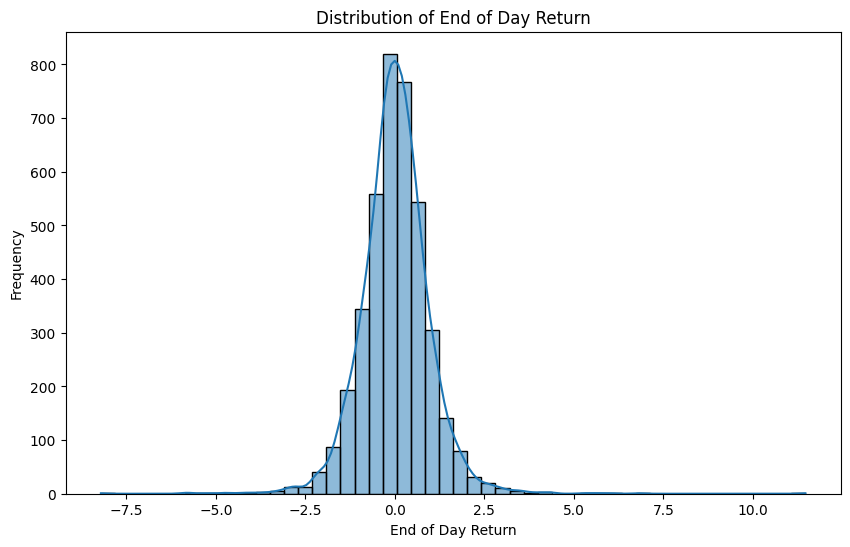

In [72]:
# Plot the distribution using seaborn
plt.figure(figsize=(10, 6))
sns.histplot(data_train['end_of_day_return'], bins=50, kde=True)
plt.title('Distribution of End of Day Return')
plt.xlabel('End of Day Return')
plt.ylabel('Frequency')
plt.show()

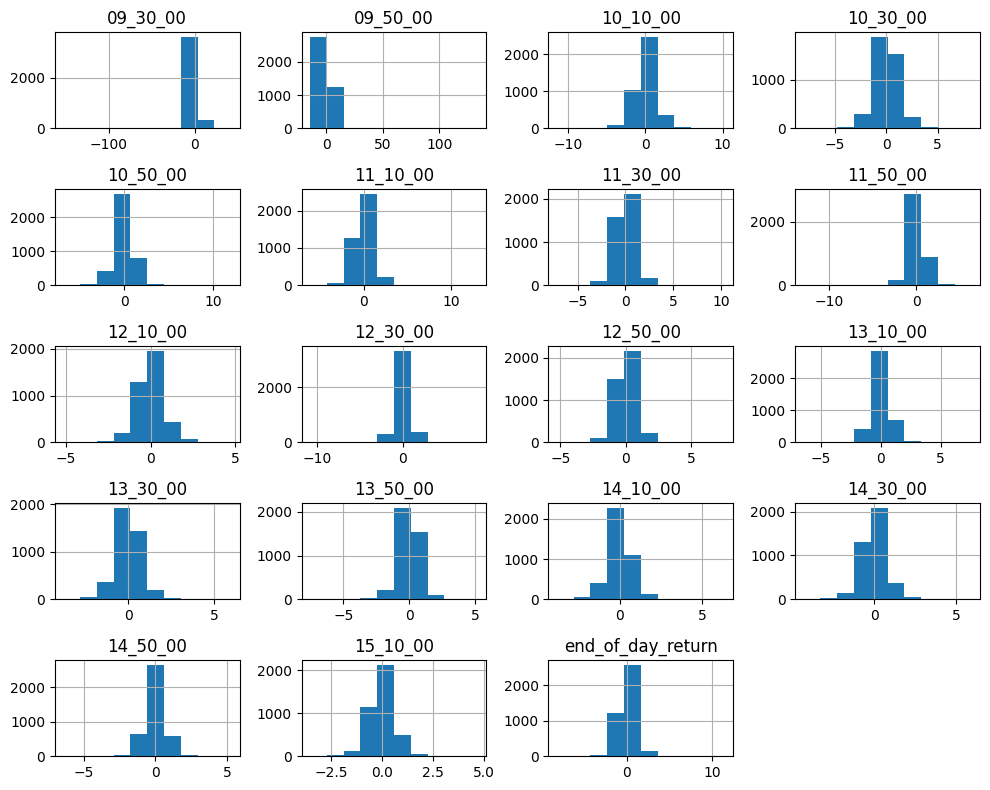

In [73]:
data_train.hist(figsize=(10, 8));
plt.tight_layout()  # Adjust subplots to fit into figure area.
plt.show()

### Model Building and Evaluate

In [74]:
y = data_train.pop('end_of_day_return')
X = data_train.copy()

In [75]:
def weighted_accuracy(y_true, y_pred):
    weights = np.abs(y_true)
    # Compute the sign of true and predicted values
    sign_true = np.sign(y_true)
    sign_pred = np.sign(y_pred)

    # Correct predictions where the sign of the true and predicted values match
    correct_predictions = sign_true == sign_pred
    # Compute the weighted accuracy
    weighted_acc = np.sum(weights * correct_predictions) / np.sum(weights)
    
    return weighted_acc

In [76]:
# Function to plot the evaluation results
def plot_results(mse_train, mse_test, w_acc_train, w_acc_test):
    plt.figure(figsize=(12, 6))

    # MSE plot
    plt.subplot(1, 2, 1)
    plt.plot(mse_train, label="Train MSE", marker='o')
    plt.plot(mse_test, label="Test MSE", marker='o')
    plt.fill_between(range(len(mse_train)), np.min(mse_train), np.max(mse_train), color='blue', alpha=0.1)
    plt.fill_between(range(len(mse_test)), np.min(mse_test), np.max(mse_test), color='orange', alpha=0.1)
    plt.title("MSE over Folds")
    plt.xlabel("Fold")
    plt.ylabel("MSE")
    plt.legend()
    plt.grid(True)

    # weighted_accuracy plot
    plt.subplot(1, 2, 2)
    plt.plot(w_acc_train, label="Train weighted_accuracy", marker='o')
    plt.plot(w_acc_test, label="Test weighted_accuracy", marker='o')
    plt.fill_between(range(len(w_acc_train)), np.min(w_acc_train), np.max(w_acc_train), color='blue', alpha=0.1)
    plt.fill_between(range(len(w_acc_test)), np.min(w_acc_test), np.max(w_acc_test), color='orange', alpha=0.1)
    plt.title("weighted_accuracy over Folds")
    plt.xlabel("Fold")
    plt.ylabel("weighted_accuracy")
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

def plot_multi_model_results(results):
    # Set up the plot
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 20))
    
    # Colors for train and test
    train_color = 'skyblue'
    test_color = 'lightgreen'
    
    # Plot MSE
    ax1.set_title('Mean Squared Error (MSE) Comparison', fontsize=16)
    ax1.set_ylabel('MSE', fontsize=12)
    ax1.set_xlabel('Models', fontsize=12)
    ax1.grid(True, linestyle='--', alpha=0.7)
    
    # Plot weighted_accuracy
    ax2.set_title('weighted_accuracy Comparison', fontsize=16)
    ax2.set_ylabel('weighted_accuracy', fontsize=12)
    ax2.set_xlabel('Models', fontsize=12)
    ax2.grid(True, linestyle='--', alpha=0.7)
    
    x = np.arange(len(results))
    width = 0.35
    
    for i, (model_name, scores) in enumerate(results.items()):
        # MSE
        mse_train = scores['mse_train']
        mse_test = scores['mse_test']
        
        ax1.bar(x[i] - width/2, np.mean(mse_train), width, label='Train' if i == 0 else "", 
                color=train_color, alpha=0.7)
        ax1.bar(x[i] + width/2, np.mean(mse_test), width, label='Test' if i == 0 else "", 
                color=test_color, alpha=0.7)
        
        ax1.errorbar(x[i] - width/2, np.mean(mse_train), 
                     yerr=[[np.mean(mse_train)-np.min(mse_train)], [np.max(mse_train)-np.mean(mse_train)]], 
                     fmt='none', ecolor='black', capsize=5)
        ax1.errorbar(x[i] + width/2, np.mean(mse_test), 
                     yerr=[[np.mean(mse_test)-np.min(mse_test)], [np.max(mse_test)-np.mean(mse_test)]], 
                     fmt='none', ecolor='black', capsize=5)
        
        # weighted_accuracy
        w_acc_train = scores['w_acc_train']
        w_acc_test = scores['w_acc_test']
        
        ax2.bar(x[i] - width/2, np.mean(w_acc_train), width, label='Train' if i == 0 else "", 
                color=train_color, alpha=0.7)
        ax2.bar(x[i] + width/2, np.mean(w_acc_test), width, label='Test' if i == 0 else "", 
                color=test_color, alpha=0.7)
        
        ax2.errorbar(x[i] - width/2, np.mean(w_acc_train), 
                     yerr=[[np.mean(w_acc_train)-np.min(w_acc_train)], [np.max(w_acc_train)-np.mean(w_acc_train)]], 
                     fmt='none', ecolor='black', capsize=5)
        ax2.errorbar(x[i] + width/2, np.mean(w_acc_test), 
                     yerr=[[np.mean(w_acc_test)-np.min(w_acc_test)], [np.max(w_acc_test)-np.mean(w_acc_test)]], 
                     fmt='none', ecolor='black', capsize=5)
    
    ax1.set_xticks(x)
    ax1.set_xticklabels(results.keys(), rotation=45, ha='right')
    ax2.set_xticks(x)
    ax2.set_xticklabels(results.keys(), rotation=45, ha='right')
    
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper left')
    
    plt.tight_layout()
    plt.show()

#### Simple Baseline

In [77]:
# Function to handle train-test evaluation in a fold
def train_and_evaluate(X_train, X_test, y_train, y_test, model):
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions on train set
    y_pred_train = model.predict(X_train)
    # Make predictions on train set
    y_pred_test = model.predict(X_test)
    
    # Compute MSE for train and test
    mse_train = mean_squared_error(y_train, y_pred_train)
    mse_test = mean_squared_error(y_test, y_pred_test)
    
    # Compute weighted_accuracy
    
    w_acc_train = weighted_accuracy(y_train, y_pred_train)
    w_acc_test = weighted_accuracy(y_test, y_pred_test)
    
    return mse_train, mse_test, w_acc_train, w_acc_test


def run_multi_model_cv(X, y, models, n_splits=5):
    fold = KFold(n_splits=n_splits)
    results = {name: {'mse_train': [], 'mse_test': [], 'w_acc_train': [], 'w_acc_test': []} 
               for name in models.keys()}
    
    for train_index, test_index in fold.split(X, y):
        X_train, X_test = X.iloc[train_index].copy(), X.iloc[test_index].copy()
        y_train, y_test = y.iloc[train_index].copy(), y.iloc[test_index].copy()
        
        for name, model in models.items():
            mse_train, mse_test, w_acc_train, w_acc_test = train_and_evaluate(
                X_train, X_test, y_train, y_test, model
            )
            results[name]['mse_train'].append(mse_train)
            results[name]['mse_test'].append(mse_test)
            results[name]['w_acc_train'].append(w_acc_train)
            results[name]['w_acc_test'].append(w_acc_test)
        # Find the model with the best mean w_acc test score
    best_mean_w_acc = -1
    best_model = None
    best_min_w_acc = None
    best_max_w_acc = None
    
    for name, result in results.items():
        w_acc_test_scores = result['w_acc_test']
        mean_w_acc_test = sum(w_acc_test_scores) / len(w_acc_test_scores)  # Calculate mean w_acc score
        min_w_acc_test = min(w_acc_test_scores)  # Minimum w_acc score
        max_w_acc_test = max(w_acc_test_scores)  # Maximum w_acc score
        
        if mean_w_acc_test > best_mean_w_acc:
            best_mean_w_acc = mean_w_acc_test
            best_min_w_acc = min_w_acc_test
            best_max_w_acc = max_w_acc_test
            best_model = name
    
    # Print the best mean w_acc test score, min, max, and the associated model
    print(f"Best mean w_acc test score: {best_mean_w_acc:.4f} by model: {best_model}")
    print(f"Min w_acc test score: {best_min_w_acc:.4f}, Max w_acc test score: {best_max_w_acc:.4f}")
    return results


In [78]:
# Step 1: Run cross-validation
results = run_multi_model_cv(X, y, {"RandomForestRegressor": RandomForestRegressor(n_jobs=-1)})

Best mean w_acc test score: 0.5189 by model: RandomForestRegressor
Min w_acc test score: 0.5015, Max w_acc test score: 0.5378


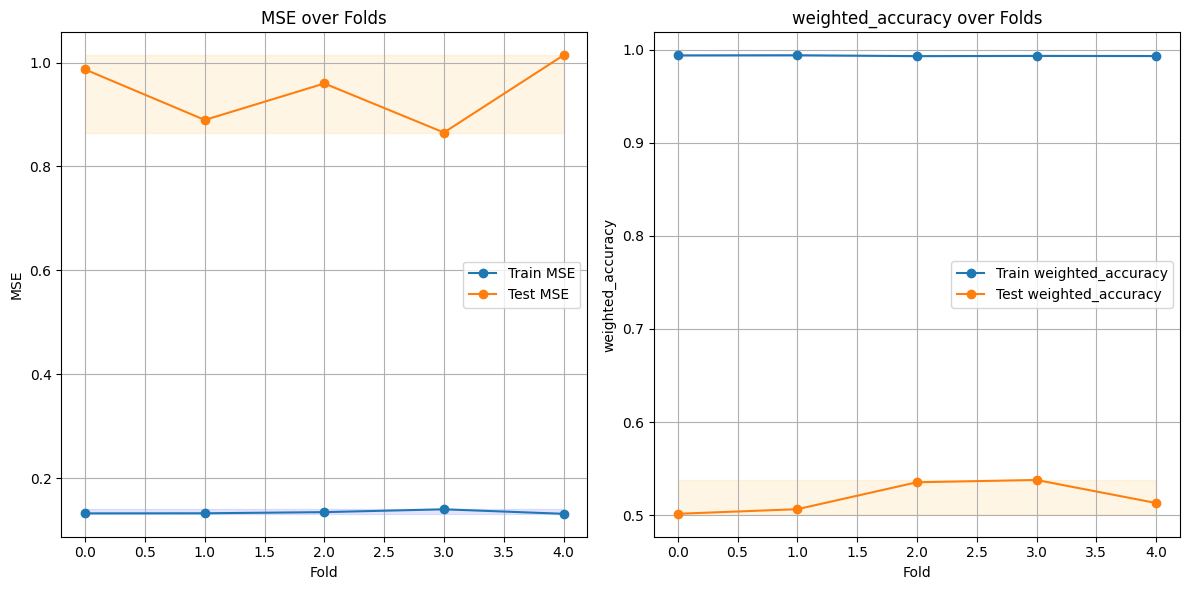

In [79]:
# Step 2: Plot the results
plot_results(results["RandomForestRegressor"]["mse_train"],
             results["RandomForestRegressor"]["mse_test"],
             results["RandomForestRegressor"]["w_acc_train"],
             results["RandomForestRegressor"]["w_acc_test"])

In [80]:
models = {
    'Ridge': Ridge(),
    'Decision Tree Regressor': RandomForestRegressor(n_jobs=-1)
    }

In [81]:
# Run cross-validation for regression models
results = run_multi_model_cv(X, y, models)

Best mean w_acc test score: 0.5275 by model: Decision Tree Regressor
Min w_acc test score: 0.5171, Max w_acc test score: 0.5578


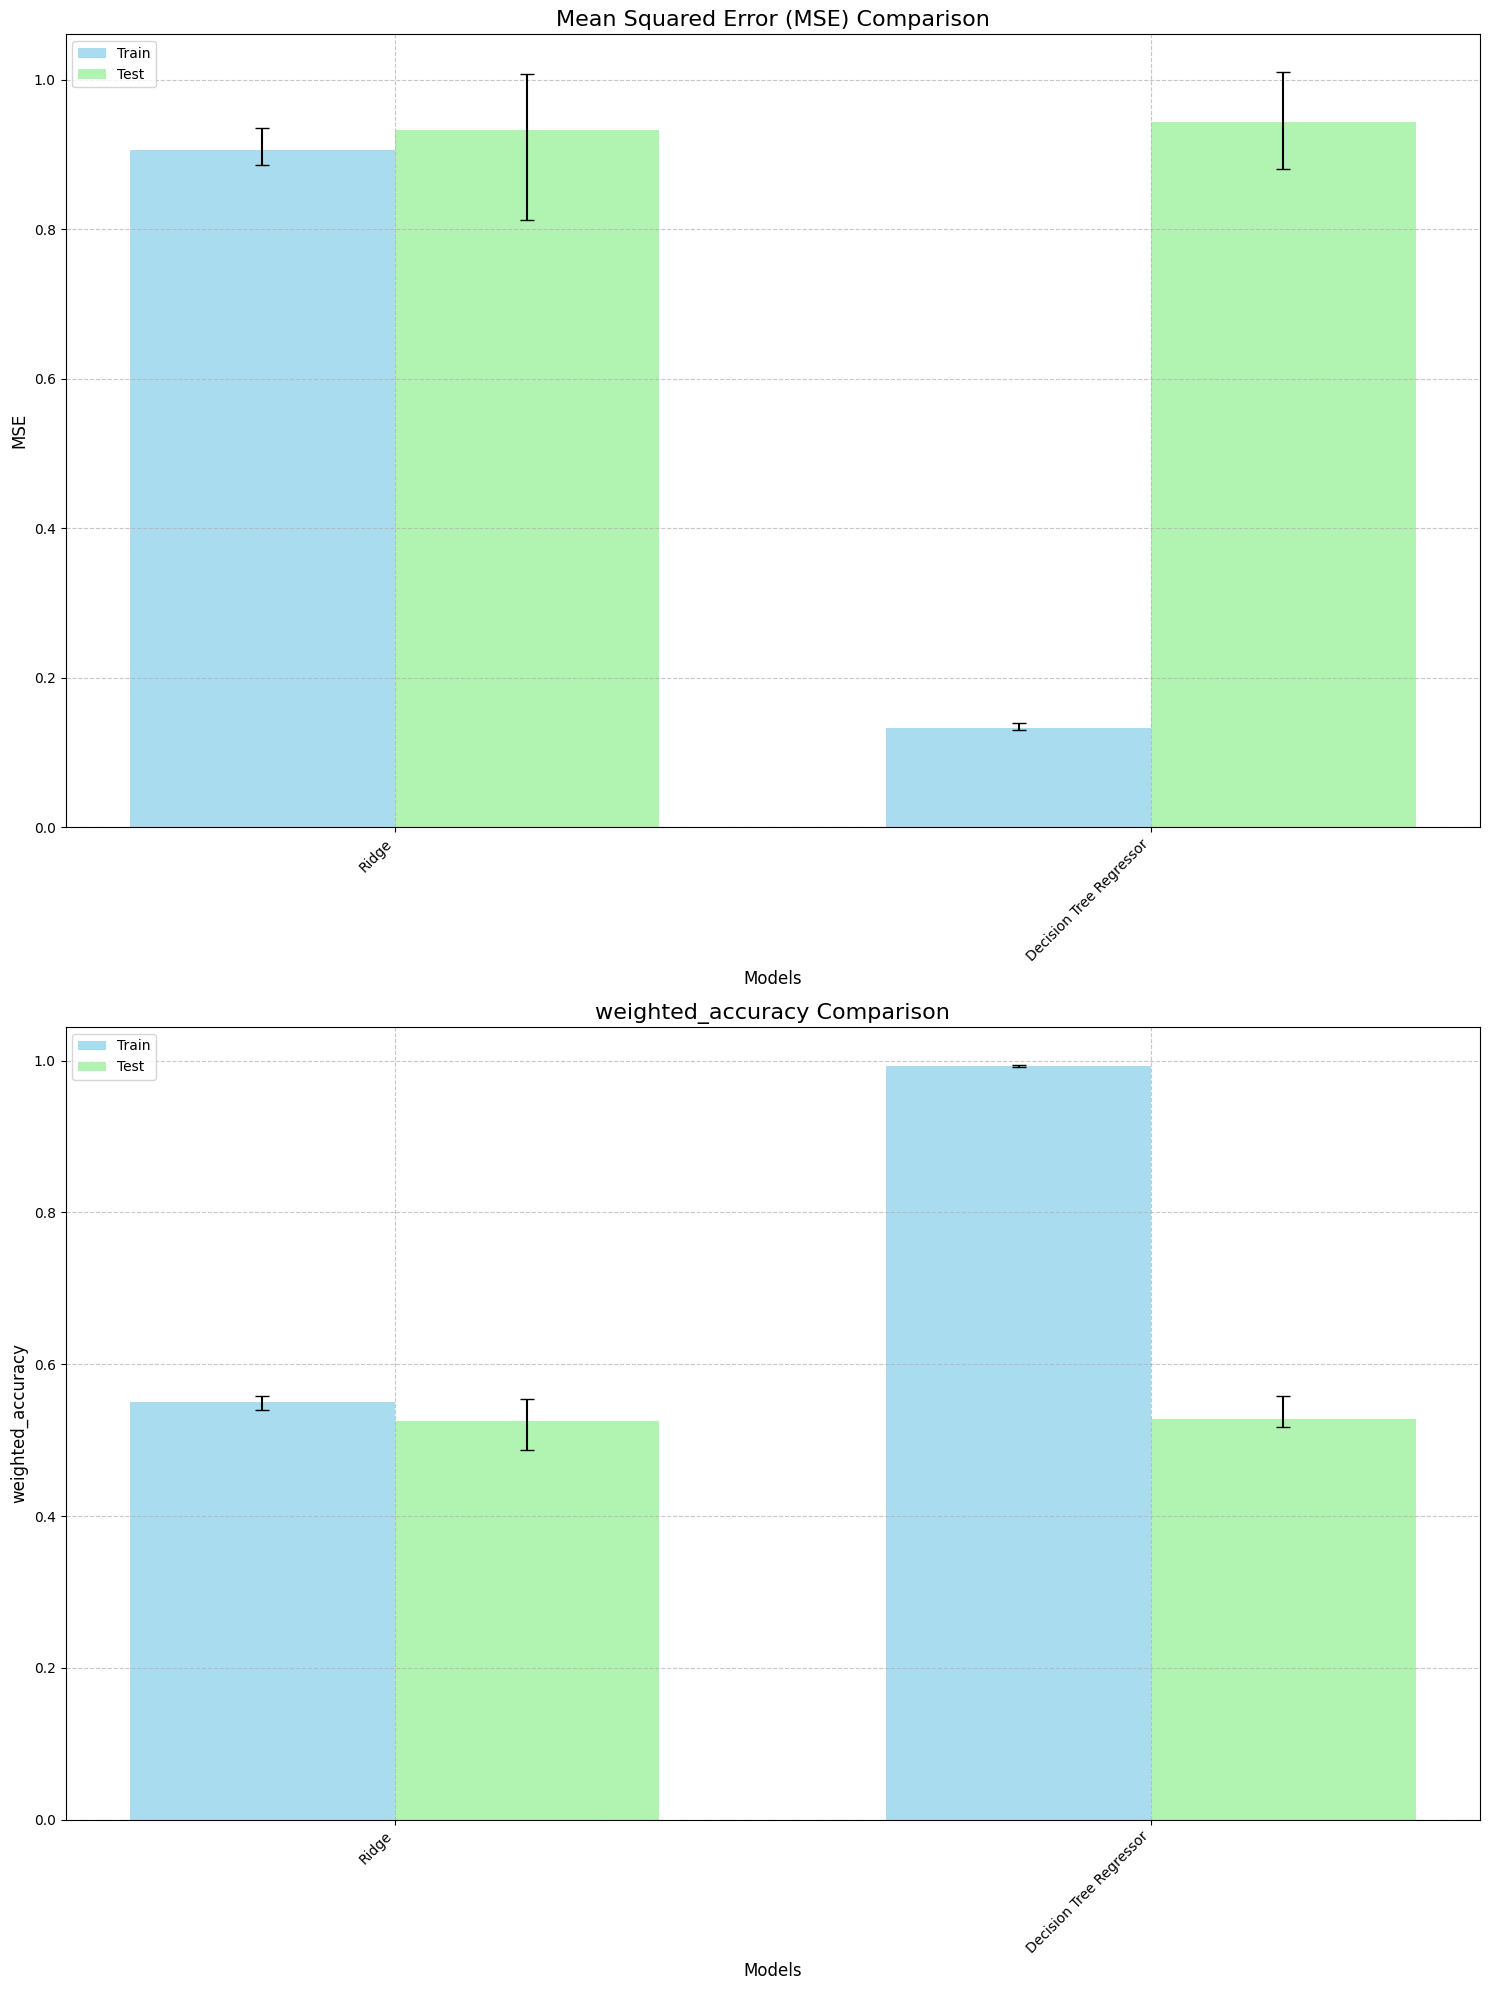

In [82]:
# Plot MSE results for regression models
plot_multi_model_results(results)

# EXERCICE 1

### Models

In [83]:
# On va tester quelques modèles de régression
models = {
    'Ridge': Ridge(),
    'Decision Tree Regressor': RandomForestRegressor(n_jobs=-1),
    'KNeighborsRegressor' :  KNeighborsRegressor(),
    'XGBRegressor' : XGBRegressor(),
    'LGBMRegressor' :LGBMRegressor(verbose=-1)
    }

In [84]:
results = run_multi_model_cv(X, y, models)

Best mean w_acc test score: 0.5254 by model: Ridge
Min w_acc test score: 0.4869, Max w_acc test score: 0.5544


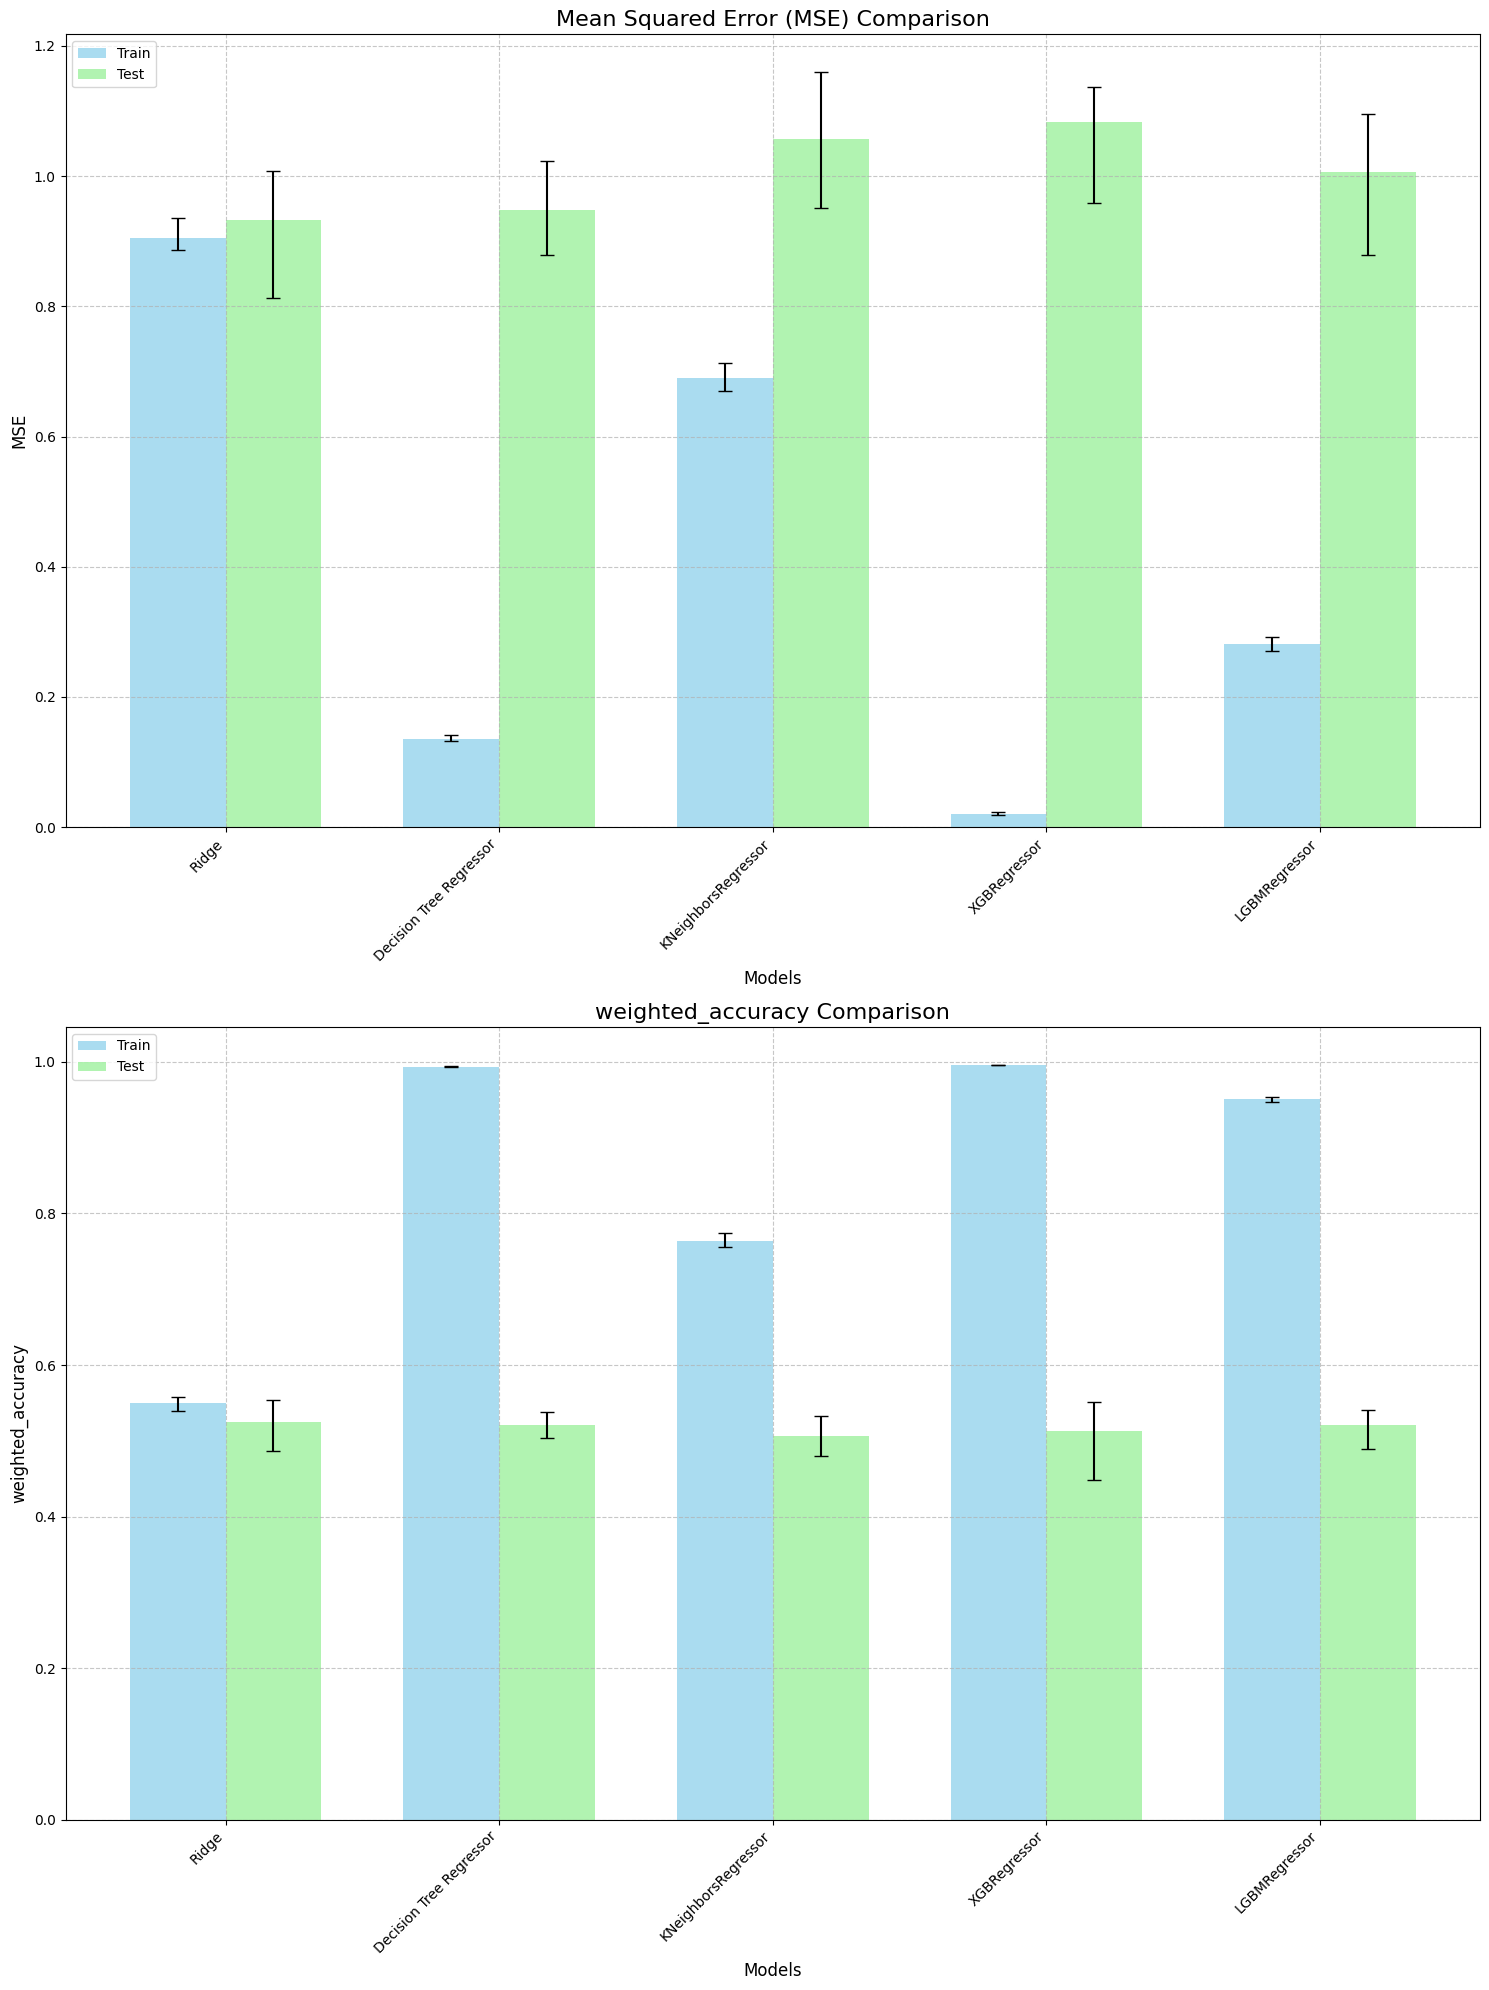

In [85]:
plot_multi_model_results(results)

Mise à part pour Ridge on overfit beaucoup 

### Hyperparametrisation

Essayons d'optimiser les modèles

In [93]:
custom_scorer = make_scorer(weighted_accuracy)
delta_stopper = DeltaYStopper(delta=0.001, n_best=3)

In [94]:
#xgboost
param_space = {
    'n_estimators': Integer(50, 1000),
    'learning_rate': Real(0.01, 1.0, prior='log-uniform'),
    'max_depth': Integer(3, 10),
    'subsample': Real(0.5, 1.0),
    'colsample_bytree': Real(0.5, 1.0)
}
opt_xgb = BayesSearchCV(
    XGBRegressor(),
    param_space,
    n_iter=100,
    cv=5, 
    n_jobs=-1, 
    verbose=0,
    scoring=custom_scorer,
    refit=False)
    
opt_xgb.fit(X, y,callback=[delta_stopper])
best_params = opt_xgb.best_params_
XGB_model = XGBRegressor(**best_params)

In [95]:
#RandomForest
search_spaces = {
    'n_estimators': Integer(10, 200),  # Uniform prior
    'max_depth': Integer(1, 20),  # Uniform prior
    'min_samples_split': Real(0.1, 1.0, prior='uniform'),  # Uniform prior
    'min_samples_leaf': Real(0.1, 0.5, prior='log-uniform'),  # Log-uniform prior
    'max_features': Categorical(['sqrt', 'log2']),  # Categorical prior
    'bootstrap': Categorical([True, False])  # Categorical prior
}
opt_rf = BayesSearchCV(
    RandomForestRegressor(),
    search_spaces,
    n_iter=50, # The algorithm will try up to 50 different hyperparameter combinations.
    cv=5,
    n_jobs=-1,
    random_state=42,
    scoring=custom_scorer,
    refit=False
)
opt_rf.fit(X, y,callback=[delta_stopper]) 
best_params = opt_rf.best_params_
RF_model = RandomForestRegressor(**best_params)

In [96]:
#Ridge
ridge_search_spaces = {
    'alpha': Real(1e-6, 1e3, prior='log-uniform'),  # Log-uniform prior for regularization strength
    'fit_intercept': Categorical([True, False])  # Categorical prior for intercept fitting
} 
opt_ridge = BayesSearchCV(
    Ridge(),
    ridge_search_spaces,
    n_iter=50,  # Nombre d'itérations
    cv=5, 
    n_jobs=-1,
    random_state=42,
    scoring=custom_scorer,
    refit=False
)

# Entraîner le modèle Ridge
opt_ridge.fit(X, y,callback=[delta_stopper])
best_params = opt_ridge.best_params_
Ridge_model = Ridge(**best_params)

In [97]:
#KNeighbors
knn_search_spaces = {
    'n_neighbors': Integer(1, 50),  # Nombre de voisins
    'weights': Categorical(['uniform', 'distance']),  # Pondération uniforme ou en fonction de la distance
    'algorithm': Categorical(['auto', 'ball_tree', 'kd_tree', 'brute']),  # Algorithme utilisé pour les calculs
    'leaf_size': Integer(10, 100),  # Taille des feuilles pour les arbres
    'p': Integer(1, 2)  # p = 1 (manhattan), p = 2 (euclidean)
}
opt_knn = BayesSearchCV(
    KNeighborsRegressor(),
    knn_search_spaces,
    n_iter=100,  # Nombre d'itérations
    cv=5,  # Validation croisée
    n_jobs=-1,
    random_state=42,
    scoring=custom_scorer,
    refit=False
)
opt_knn.fit(X, y,callback=[delta_stopper])
best_params = opt_knn.best_params_
KNeighbors_model = KNeighborsRegressor(**best_params)

In [98]:
#LGBM
param_space = {
    'n_estimators': Integer(50, 1000),
    'learning_rate': Real(0.01, 1.0, prior='log-uniform'),
    'num_leaves': Integer(20, 100),
    'feature_fraction': Real(0.5, 1.0),
    'bagging_fraction': Real(0.5, 1.0)
}
opt_lgbm = BayesSearchCV(LGBMRegressor(),
    param_space,
    n_iter=100,
    cv=5,
    n_jobs=-1, 
    verbose=0,
    scoring=custom_scorer,
    refit=False
    )
    
opt_lgbm.fit(X, y,callback=[delta_stopper])
best_params = opt_lgbm.best_params_
LGBM_model = LGBMRegressor(**best_params)

### CV with bests parameters 

In [99]:
best_models = {
    'Ridge': Ridge_model,
    'Random Forest Regressor': RF_model,
    'KNeighborsRegressor' :  KNeighbors_model,
    'XGBRegressor' : XGB_model,
    'LGBMRegressor' :LGBM_model
    }

In [100]:
my_results = run_multi_model_cv(X, y, best_models)

Best mean w_acc test score: 0.5371 by model: XGBRegressor
Min w_acc test score: 0.4991, Max w_acc test score: 0.5667


In [101]:
for name, metric in my_results.items():
    score = np.mean(metric["w_acc_test"])
    print(f"{name} : {score}")

Ridge : 0.530574220915881
Random Forest Regressor : 0.5222505422757253
KNeighborsRegressor : 0.5261367684829329
XGBRegressor : 0.5371235372712432
LGBMRegressor : 0.5320322186031744


On dépasse 0.53 avec plusieurs modèles !  
Ici Random Forest est en dessous de 0.53 mais j'ai eu des résultats meilleurs auparavant

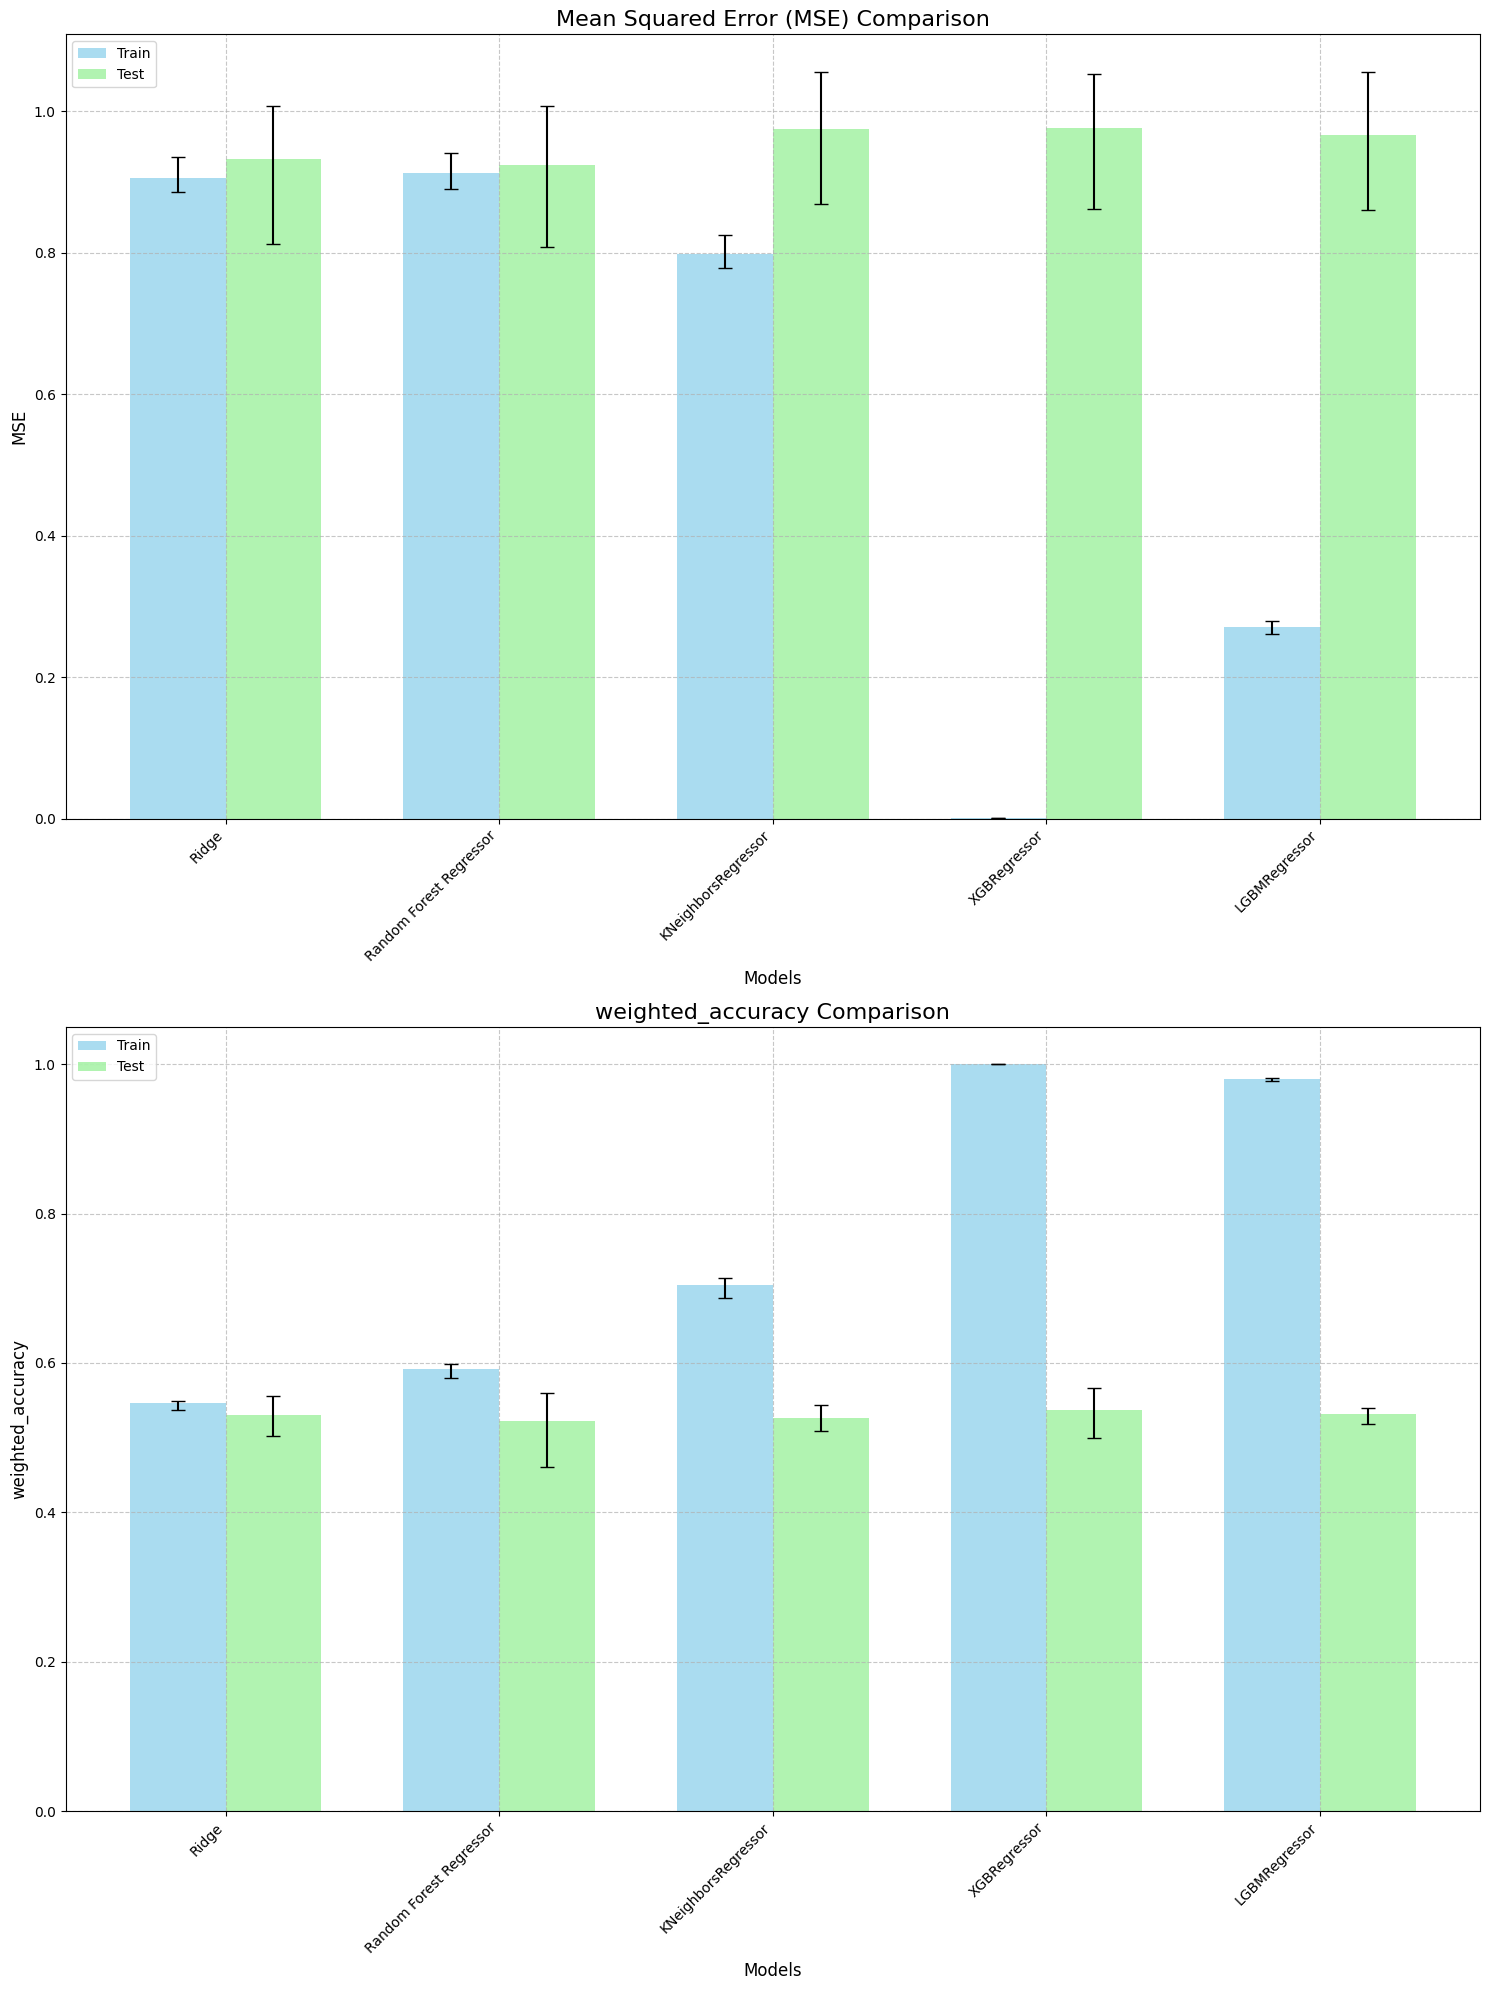

In [102]:
plot_multi_model_results(my_results)

On constate qu'on overfit beaucoup moins, sauf pour XGB et LGBM  
Pourtant XGB avait le meilleur score sur le test

### Simple Bagging

Essayons un bagging avec Random Forest (je pensais que c'était mon meilleur modèle mais sur ma dernière hyperparamétrisation ce n'était pas le cas)

In [103]:
bagging_regressor = BaggingRegressor(
    estimator=RF_model,
    n_estimators=100,
    max_samples=0.8,
    max_features=0.8,
    bootstrap=True,
    bootstrap_features=True,
    n_jobs=-1,
    random_state=42
)
best_models["Bagging_method"]= bagging_regressor

In [104]:
my_results = run_multi_model_cv(X, y, best_models)


Best mean w_acc test score: 0.5371 by model: XGBRegressor
Min w_acc test score: 0.4991, Max w_acc test score: 0.5667


In [105]:
for name, metric in my_results.items():
    score = np.mean(metric["w_acc_test"])
    print(f"{name} : {score}")

Ridge : 0.530574220915881
Random Forest Regressor : 0.5326353910310501
KNeighborsRegressor : 0.5261367684829329
XGBRegressor : 0.5371235372712432
LGBMRegressor : 0.5320322186031744
Bagging_method : 0.5177443747571326


Le bagging model ne fait pas mieux, peut-être faut il augmenter le nombre d'estimateurs.

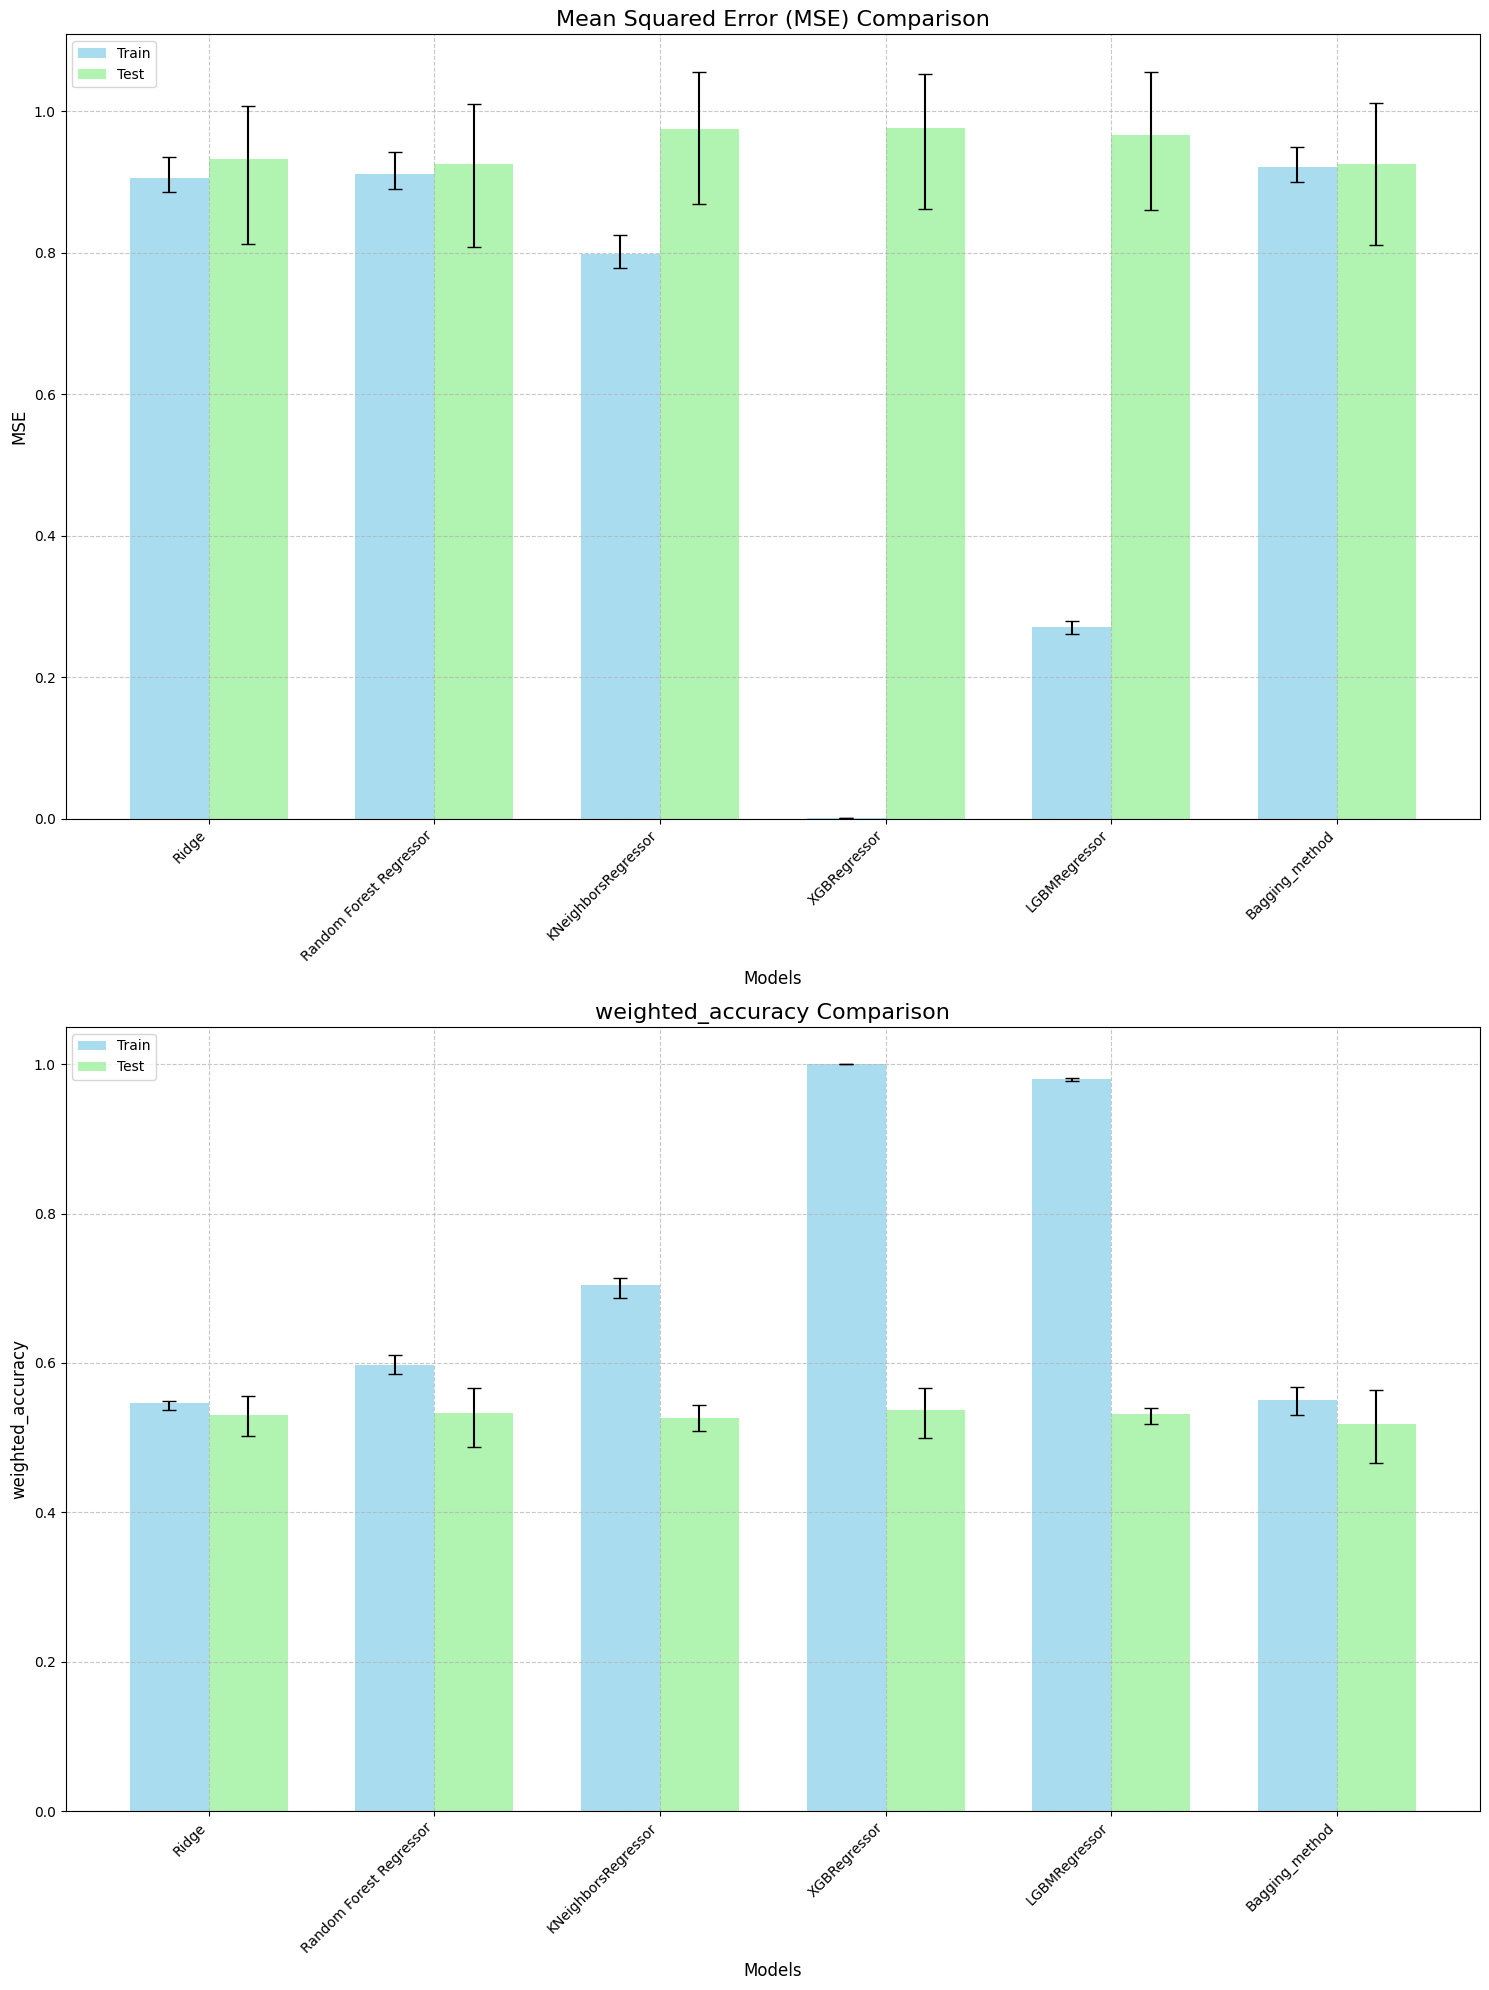

In [106]:
plot_multi_model_results(my_results)

Le modèle de bagging n'overfit pas

### Submission

In [110]:
data_train = pd.read_csv('module6_exercise_train.csv', index_col='index')
X_test = pd.read_csv('module6_exercise_test.csv', index_col='index')
y_train = data_train.pop('end_of_day_return')
X_train = data_train.copy()

In [112]:
# Train on complete data (X_train, y_train) and predict on X_test
XGB_model.fit(X_train,y_train)
my_predictions = XGB_model.predict(X_test)

In [113]:
submission = pd.DataFrame({
    'index': X_test.index,
    'end_of_day_return': my_predictions #best_model.predict(X_test_final)
})

submission.to_csv('submission.csv', index=False, sep=',')